In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import optuna
import joblib
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("../UD3_MachineLearning/csvs/loan_data.csv")
objetivo1 = 'loan_status'
df.head()

,age,gender,education,income,yrs_exp,ownership,amount,purpose,int_rate,percent_income,cred_hist_length,risk_score,previous_loans,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.dropna(inplace=True)
print(df.shape)

(44962, 14)


In [5]:
print(df['gender'].value_counts())
df['gender'] = df['gender'].replace("femal", "female")
print(df['gender'].value_counts())

gender
male      24825
female    20136
femal         1
Name: count, dtype: int64
gender
male      24825
female    20137
Name: count, dtype: int64


In [6]:
# Creamos una columna indicando si hay espacios en blanco
df['espaciosEnBlanco'] = df['ownership'].str.contains(r'\s')
df['ownership'] = df['ownership'].str.strip()
df['ownership'].value_counts()
df = df.drop('espaciosEnBlanco', axis=1)


In [7]:
# filtramos la columna age para quedarnos con edades por debajo de 100
df['age'] = df['age'].where(df['age'] < 100 )
df['age'].value_counts()
print(df['age'].isnull().sum())
df.dropna(inplace=True)
print(df.shape)
print(df['age'].isnull().sum())

7
(44955, 14)
0


In [8]:
df['yrs_exp'] = df['yrs_exp'].where(df['yrs_exp'] < 100 )
df['yrs_exp'].value_counts()
print(df['yrs_exp'].isnull().sum())
df.dropna(inplace=True)
print(df.shape)
print(df['yrs_exp'].isnull().sum())
df.head()

0
(44955, 14)
0


,age,gender,education,income,yrs_exp,ownership,amount,purpose,int_rate,percent_income,cred_hist_length,risk_score,previous_loans,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [9]:
df['gender'] = df['gender'].replace(['female', 'male'], [0, 1])
df['previous_loans'] = df['previous_loans'].replace(['Yes', 'No'], [0, 1])

# Instanciar OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Crea un array en vez de una matriz

# Aplicar el encoder a las columnas categóricas
categoricas = ['education', 'ownership', 'purpose']
valores = encoder.fit_transform(df[categoricas])

# Crear un DataFrame con los valores codificados
columnas_codificadas = encoder.get_feature_names_out(categoricas)
df_codificado = pd.DataFrame(valores, columns=columnas_codificadas, index=df.index)

# Concatenar el DataFrame original con las columnas codificadas
df = pd.concat([df.drop(columns=categoricas, axis=1), df_codificado], axis=1)

# Mostrar el DataFrame final
print(df.isnull().sum())

age                          0
gender                       0
income                       0
yrs_exp                      0
amount                       0
int_rate                     0
percent_income               0
cred_hist_length             0
risk_score                   0
previous_loans               0
loan_status                  0
education_Associate          0
education_Bachelor           0
education_Doctorate          0
education_High School        0
education_Master             0
ownership_MORTGAGE           0
ownership_OTHER              0
ownership_OWN                0
ownership_RENT               0
purpose_DEBTCONSOLIDATION    0
purpose_EDUCATION            0
purpose_HOMEIMPROVEMENT      0
purpose_MEDICAL              0
purpose_PERSONAL             0
purpose_VENTURE              0
dtype: int64


C:\Users\ESP\AppData\Local\Temp\ipykernel_12304\3030420232.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(['female', 'male'], [0, 1])
C:\Users\ESP\AppData\Local\Temp\ipykernel_12304\3030420232.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['previous_loans'] = df['previous_loans'].replace(['Yes', 'No'], [0, 1])


In [10]:
datos1 = df[["income", "amount", "int_rate", "percent_income", "previous_loans", "ownership_MORTGAGE", "ownership_RENT"]]

y = df["loan_status"]                 # Variable objetivo

scaler = StandardScaler()
X = scaler.fit_transform(datos1)
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved successfully!")

# Dividimos los datos en un 80% para entrenamiento y un 20% para evaluación (validación + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# De los datos temporales (X_temp, y_temp), dividimos en validación (10%) y test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Entrenar el modelo
rfc = RandomForestClassifier(random_state=42, max_depth=7, min_samples_split=10)
rfc.fit(X_train, y_train)  # Usar X_train y y_train

# Predecir sobre el conjunto de validación
predicciones = rfc.predict(X_val)  # Usar X_val para predicciones

# Calcular el error
error_val = mean_absolute_error(y_val, predicciones)  # Comparar con y_val
print(f'Métrica para datos de validación: {error_val}')

Scaler saved successfully!
Métrica para datos de validación: 0.08409343715239155


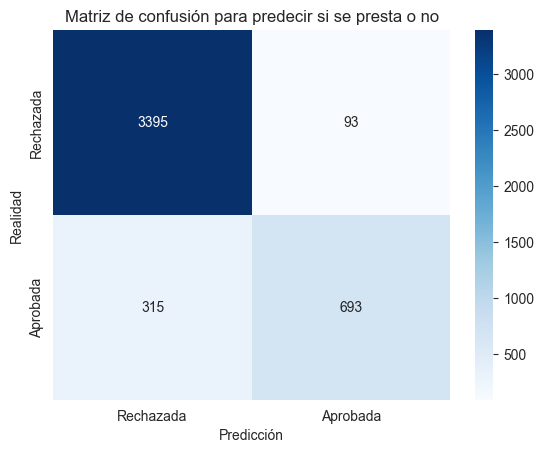

In [41]:
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rechazada", "Aprobada"], yticklabels=["Rechazada", "Aprobada"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de confusión para predecir si se presta o no")
plt.show()

In [12]:
from sklearn.utils import resample
df_major = df[df['loan_status'] == 0]
df_minor = df[df['loan_status'] == 1]

df_minor_oversampled = resample(df_minor, replace=True, n_samples=len(df_major), random_state=42)
df = pd.concat([df_major, df_minor_oversampled])

In [43]:
# Definir la función objetivo
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    # Crear el modelo RandomForestClassifier con los hiperparámetros sugeridos
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   random_state=42)

    # Validación cruzada con los datos de entrenamiento (X_train, y_train)
    model.fit(X_train, y_train)
    predicciones = model.predict(X_val)  # Predicciones en el conjunto de validación

    # Calcular el error en los datos de validación
    error_val = mean_absolute_error(y_val, predicciones)
    return error_val

# Crear el estudio de Optuna y optimizar
study = optuna.create_study(direction='minimize')  # Minimizar el error (porque queremos que sea bajo)
study.optimize(objective, n_trials=50)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)

[I 2025-05-14 18:52:00,922] A new study created in memory with name: no-name-27ec8785-0014-4336-a513-e1ec4917e4ae
[I 2025-05-14 18:52:07,931] Trial 0 finished with value: 0.07853170189098999 and parameters: {'n_estimators': 276, 'max_depth': 15, 'min_samples_split': 3}. Best is trial 0 with value: 0.07853170189098999.
[I 2025-05-14 18:52:13,131] Trial 1 finished with value: 0.08186874304783093 and parameters: {'n_estimators': 221, 'max_depth': 11, 'min_samples_split': 4}. Best is trial 0 with value: 0.07853170189098999.
[I 2025-05-14 18:52:16,833] Trial 2 finished with value: 0.08409343715239155 and parameters: {'n_estimators': 284, 'max_depth': 5, 'min_samples_split': 9}. Best is trial 0 with value: 0.07853170189098999.
[I 2025-05-14 18:52:19,749] Trial 3 finished with value: 0.08075639599555061 and parameters: {'n_estimators': 124, 'max_depth': 14, 'min_samples_split': 10}. Best is trial 0 with value: 0.07853170189098999.
[I 2025-05-14 18:52:21,215] Trial 4 finished with value: 0.083

Mejores hiperparámetros: {'n_estimators': 209, 'max_depth': 15, 'min_samples_split': 2}


In [44]:
clf = RandomForestClassifier(n_estimators=155,
                                   max_depth=13,
                                   min_samples_split=6,
                                   random_state=42)
clf.fit(X_train, y_train)
predicciones = clf.predict(X_val)
error_val = mean_absolute_error(y_val, predicciones)
print(f'Métrica para datos de validación: {error_val}')

Métrica para datos de validación: 0.07986651835372637


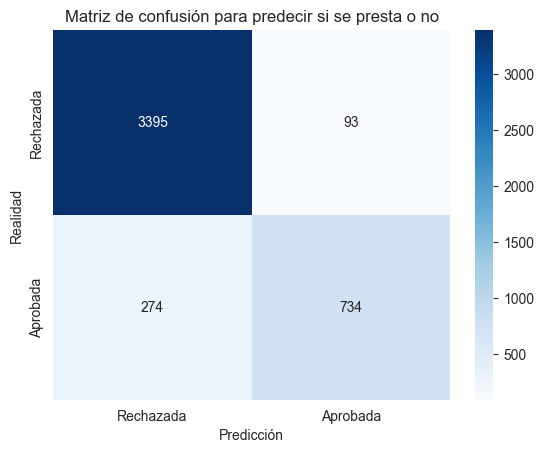

In [45]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rechazada", "Aprobada"], yticklabels=["Rechazada", "Aprobada"])
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.title("Matriz de confusión para predecir si se presta o no")
plt.show()

In [46]:
# Funcion para entrenar el modelo a prueba y obtener su matriz de confusion y un reporte con su puntuación, en test y train, recall y f1-score
def train_validation(model):
    model.fit(X_train,y_train.astype(int))
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_pred, y_test)
    print(classification_report(y_pred, y_test.astype(int)))
    print('score_test = ', model.score(X_test, y_test.astype(int)))
    print('score_train = ', model.score(X_train, y_train.astype(int)))
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Rechazada", "Aprobada"], yticklabels=["Rechazada", "Aprobada"])
    plt.title("Matriz de Confusión")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      3667
           1       0.73      0.89      0.81       829

    accuracy                           0.92      4496
   macro avg       0.85      0.91      0.88      4496
weighted avg       0.93      0.92      0.92      4496

score_test =  0.9205960854092526
score_train =  0.944361027694361


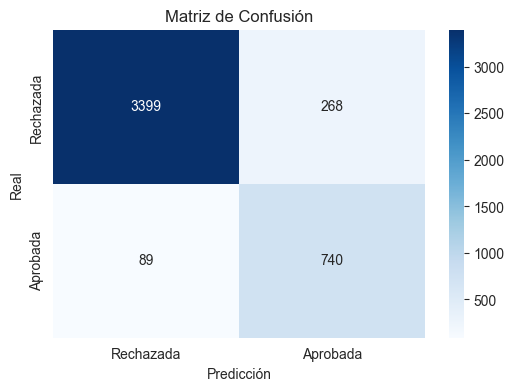

In [47]:
model = RandomForestClassifier(random_state=42, n_estimators=264, max_depth=14, min_samples_split=6)
train_validation(model)

In [48]:
# Save the model to a file
joblib.dump(model, 'banco.joblib')
# Step 3: Load the StandardScaler from the file
#loaded_scaler = joblib.load('scaler.pkl')
#print("Scaler loaded successfully!")

['banco.joblib']

In [13]:
from sklearn.svm import SVC

# 6. Crear y entrenar el modelo SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # También puedes probar 'linear', 'poly', etc.
svm_model.fit(X_train, y_train)

# 7. Realizar predicciones
y_pred = svm_model.predict(X_test)

# 8. Evaluación del modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[3366  122]
 [ 281  727]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3488
           1       0.86      0.72      0.78      1008

    accuracy                           0.91      4496
   macro avg       0.89      0.84      0.86      4496
weighted avg       0.91      0.91      0.91      4496

